In [1]:
## Import Libraries
# Data Handling
import pandas as pd
import numpy as np
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Data Splitting and Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Make the plots to look nicer
sns.set(style="whitegrid")

In [2]:
## Dataset Loading + Exploratory Data Analysis + Data Cleaning + Encoding + Splitting + Scaling

In [3]:
## Phrase 1: Dataset Loading
# Load csv file
df = pd.read_csv("TelcoCustomerChurn.csv")

# Preview first 5 rows to understand the structure
print("=== First 5 rows of the dataset ===")
print(df.head())

# Show basic info (column names, non-null counts, data types)
print("\nDataFrame info:")
print(df.info())

# Show summary statistics for numerical columns (SeniorCitizen, tenure, MonthlyCharges)
print("\nSummary statistics for numerical columns:")
print(df.describe())

=== First 5 rows of the dataset ===
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV 


Churn value counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


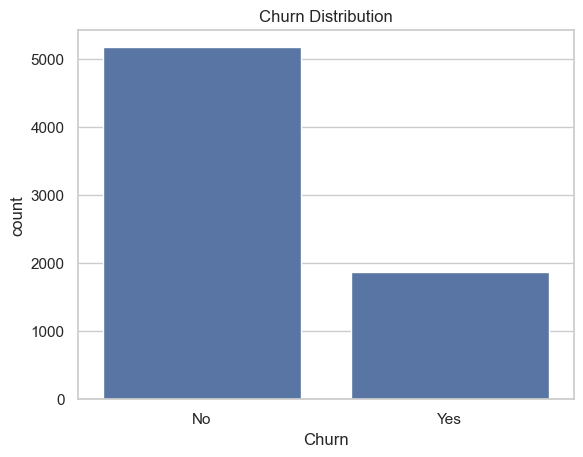

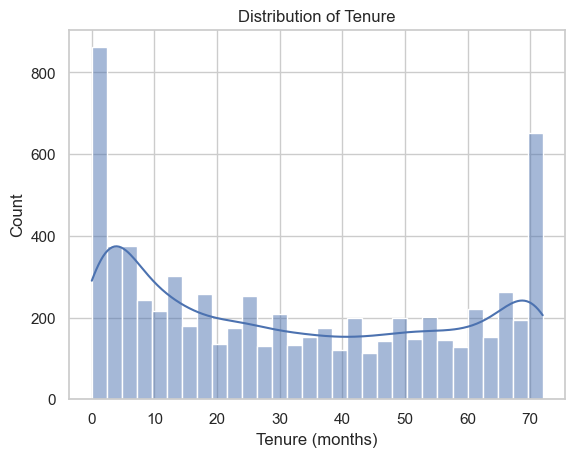

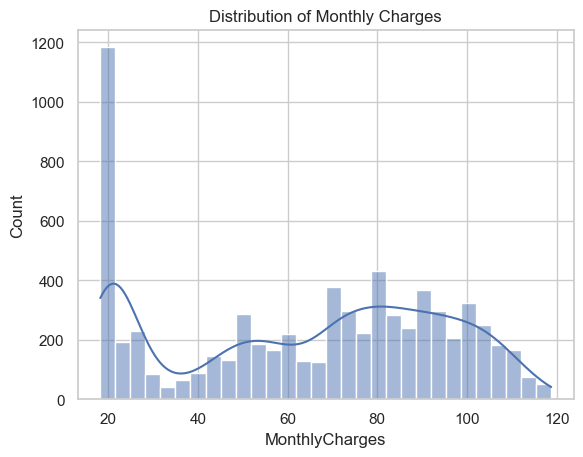

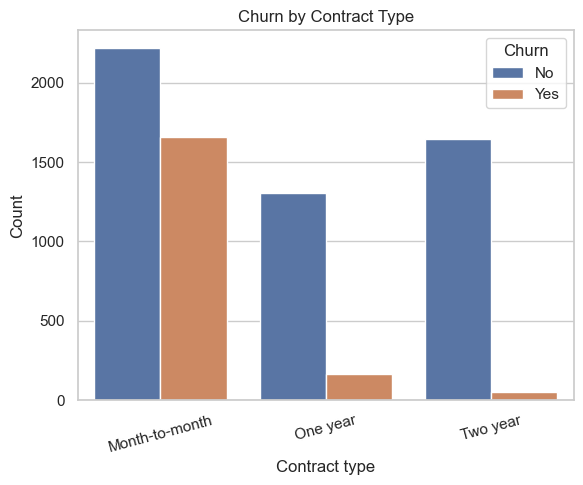

In [4]:
## Phrase 2: Exploratory Data Analysis (EDA)
# Churn distribution (counts and percentage)
print("\nChurn value counts:")
print(df['Churn'].value_counts())
print("\nChurn percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

plt.figure()
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

# Distribution of tenure (how long customers stay)
plt.figure()
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

# Distribution of MonthlyCharges
plt.figure()
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("MonthlyCharges")
plt.ylabel("Count")
plt.show()

# Relationship: Churn vs Contract 
plt.figure()
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.xlabel("Contract type")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

In [5]:
## Phrase 3: Data Cleaning
# 1. Handle Total Charges
# In the original dataset, TotalCharges has some blank spaces " "
# which make the whole column type 'object' instead of float.
print("\nTotalCharges type before cleaning:", df['TotalCharges'].dtype)

# Replace spaces with NaN, then convert to numeric (float)
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN (only 11 rows)
df = df.dropna(subset=['TotalCharges'])

print("TotalCharges type after cleaning:", df['TotalCharges'].dtype)
print("Number of rows after dropping NaN TotalCharges:", len(df))

# 2. Convert Churn to 0 and 1
# Strip any spaces around the text to ensure no leading or trailing spaces like " Yes" → "Yes"
df['Churn'] = df['Churn'].astype(str).str.strip()

print("\nUnique values in Churn BEFORE mapping:")
print(df['Churn'].unique())

# Map Yes/No to 1/0
# Clean and map Churn correctly
df['Churn'] = df['Churn'].astype(str).str.strip()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop rows where mapping failed (if got)
df = df.dropna(subset=['Churn'])
df['Churn'] = df['Churn'].astype(int) # ensure Churn is integer type (0 or 1)

print(df['Churn'].value_counts())

print("\nChurn after mapping to 0/1 (including NaN if any):")
print(df['Churn'].value_counts(dropna=False))
print("\nNumber of NaN in Churn:", df['Churn'].isna().sum()) #check for NaN

# 3. Drop CustomerID
# # customerID is a unique identifier and does not carry useful predictive information
df = df.drop(columns=['customerID'], errors='ignore')

print("\nColumns after dropping customerID:")
print(df.columns)
print("\nCurrent shape of dataframe (rows, columns):", df.shape)


TotalCharges type before cleaning: object
TotalCharges type after cleaning: float64
Number of rows after dropping NaN TotalCharges: 7032

Unique values in Churn BEFORE mapping:
['No' 'Yes']
Churn
0    5163
1    1869
Name: count, dtype: int64

Churn after mapping to 0/1 (including NaN if any):
Churn
0    5163
1    1869
Name: count, dtype: int64

Number of NaN in Churn: 0

Columns after dropping customerID:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Current shape of dataframe (rows, columns): (7032, 20)


In [6]:
## Phrase 4: Feature and Target Separation & One-Hot Encoding
# 1. Separate features and target
# Target variable
y = df['Churn'] # label that we want to predict

# Features 
X = df.drop('Churn', axis=1) # all columns except Churn

print("\nShape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# 2. Identify categorical and numerical columns 
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

print("\nCategorical columns:")
print(list(cat_cols))

print("\nNumerical columns:")
print(list(num_cols))

# 3. Use pandas.get_dummies to one-hot encode categorical features
# converts each category into binary indicator columns
X_encoded = pd.get_dummies(X, drop_first=True) # drop_first=True avoids redundant columns 

print("\nOriginal shape:", X.shape)
print("Encoded shape:", X_encoded.shape)
print("Encoded feature columns:")
print(X_encoded.columns[:10])  # print first 10 to check


Shape of X (features): (7032, 19)
Shape of y (target): (7032,)

Categorical columns:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Original shape: (7032, 19)
Encoded shape: (7032, 30)
Encoded feature columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes'],
      dtype='object')


In [7]:
# Phase 5: Train, Validation, Test Split and Standardisation
# 1. Split into Test 70 / 15 / 15
# 1st split: 70% train, 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_encoded,
    y,
    train_size=0.7,    # 70% training data
    random_state=42,   # fixed seed for reproducibility
    stratify=y        # keep churn ratio similar across splits
)

# 2nd split: for the 30%, half for validation, half for test to 15% / 15%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    train_size=0.5,    # 50% of the remaining 30%
    random_state=42,
    stratify=y_temp
)

print("\nTrain shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

# Helper function: print churn ratio in each split
def print_class_ratio(name, y_data):
    print(f"{name} set class distribution (%):")
    print(y_data.value_counts(normalize=True) * 100)
    print()

print_class_ratio("Train", y_train)
print_class_ratio("Validation", y_val)
print_class_ratio("Test", y_test)

# 2. Standardisation (scale the features)
scaler = StandardScaler()

# Fit only on training data only to avoid data leakage
scaler.fit(X_train)

# Transform train, validation, and test with the same scaler
X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

print("\nAfter scaling:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# Input dimension for neural network (number of features after encoding)
input_dimension = X_train_scaled.shape[1]
print("\nInput dimension (number of features):", input_dimension)


Train shape: (4922, 30) (4922,)
Validation shape: (1055, 30) (1055,)
Test shape: (1055, 30) (1055,)
Train set class distribution (%):
Churn
0    73.425437
1    26.574563
Name: proportion, dtype: float64

Validation set class distribution (%):
Churn
0    73.364929
1    26.635071
Name: proportion, dtype: float64

Test set class distribution (%):
Churn
0    73.459716
1    26.540284
Name: proportion, dtype: float64


After scaling:
X_train_scaled shape: (4922, 30)
X_val_scaled shape: (1055, 30)
X_test_scaled shape: (1055, 30)

Input dimension (number of features): 30


In [8]:
from sklearn.neural_network import MLPClassifier

def train_and_evaluate(hidden_layers=(32,16),
                       activation='relu',
                       alpha=0.001,
                       learning_rate='adaptive',
                       batch_size=64,
                       max_iter=200,
                       random_state=42):
    """
    Train and evaluate a neural network with given architecture.
    Returns model, train accuracy, validation accuracy.
    """

    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        activation=activation,
        solver='adam',      
        alpha=alpha,        
        learning_rate=learning_rate,
        batch_size=batch_size,
        max_iter=max_iter,
        random_state=random_state,
        early_stopping=False
    )

    # train model
    mlp.fit(X_train_scaled, y_train)

    # evaluate
    train_acc = mlp.score(X_train_scaled, y_train)
    val_acc   = mlp.score(X_val_scaled,   y_val)

    print("\n--------------------------------------")
    print(f"Architecture: {hidden_layers}")
    print(f"Activation : {activation}")
    print(f"Train Acc  : {train_acc:.4f}")
    print(f"Val Acc    : {val_acc:.4f}")

    return mlp, train_acc, val_acc

In [9]:
results = {}

# Model 1 — Small network
results['model_16'] = train_and_evaluate(hidden_layers=(16,))

# Model 2 — Medium network
results['model_32_16'] = train_and_evaluate(hidden_layers=(32,16))

# Model 3 — Large network
results['model_64_32'] = train_and_evaluate(hidden_layers=(64,32))

# Optional: deeper network
results['model_32_16_8'] = train_and_evaluate(hidden_layers=(32,16,8))



--------------------------------------
Architecture: (16,)
Activation : relu
Train Acc  : 0.8318
Val Acc    : 0.8114


C:\Users\Irenehaha\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------------------------
Architecture: (32, 16)
Activation : relu
Train Acc  : 0.8773
Val Acc    : 0.7621


C:\Users\Irenehaha\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--------------------------------------
Architecture: (64, 32)
Activation : relu
Train Acc  : 0.9486
Val Acc    : 0.7583

--------------------------------------
Architecture: (32, 16, 8)
Activation : relu
Train Acc  : 0.8937
Val Acc    : 0.7640


C:\Users\Irenehaha\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
